<h1><center><br>Binary Classification with Logistic Regression<br></center></h1>

# Overview

In this project, you are going to implement logistic regression from scratch. You are provided
a subset of the famous handwritten digit dataset called MNIST. In the subset, you will find images of digit 1 and 5. Therefore, you will be solving a binary classification problem. The project includes feature extraction, model training, and evaluation steps.

First, you will load and visualize the data portion we have provided to you and then extract two different set of features to build a classifier on. When you extracted the desired features, you will run your logistic regression implementation with gradient descent on the representations to classify digits into 1 and 5. You will experiment with different learning rates  and regularization parameter ($\lambda$) and find the optimal $\lambda$ with 5-fold cross validation. Finally, you will evaluate the implemented models, decide which is the best performing one and visualize a decision boundary.

Follow the steps on this notebook that would guide you through the solution step-by-step. Make sure that the notebook reports your work properly and add comments and opinions when necessary.

## Feature Extraction 

Load the training/test data and labels as numpy arrays (Hint:`np.load`). Train and test data are 1561x256 and 424x256 dimensional matrices, respectively. Each row in the
aforementioned matrices corresponds to an image of a digit. The 256 pixels correspond to a 16x16 image. Label 1 is assigned to digit 1 and label -1 is assigned to digit 5.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#import training and test data
test_data = np.load('test_data.npy')
test_labels = np.load('test_labels.npy')
train_data = np.load('train_data.npy')
train_labels = np.load('train_labels.npy')


 Display two of the digit images, one for digit 1 and one for digit 5. You can use `imshow` function of `matplotlib` library with a suitable colormap. You will first need to reshape 256 pixels to a 16x16 matrix. 

Train Data


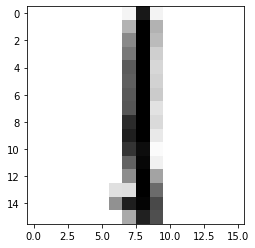

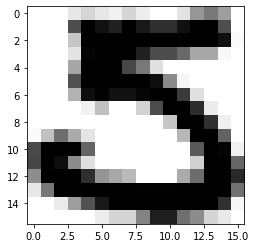

Test Data


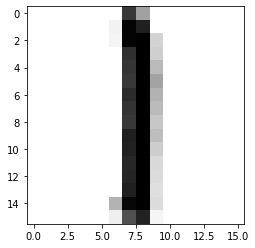

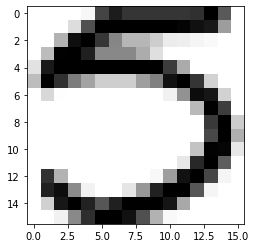

In [2]:
#Reshape train data to 16x16
train_data_16x16 = np.reshape(train_data, (1561,16,16))

#Reshape test data to 16x16
test_data_16x16 = np.reshape(test_data, (424,16,16))

#For train data
print('Train Data')
#Display digit 1
i = 0
while (i < 1561):
    i+=1
    if (train_labels[i,] == 1):
        plt.imshow(train_data_16x16[i,:,:], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.show()
        break
        
#Display digit 5
i = 0       
while (i < 1561):
    i+=1
    if (train_labels[i,] == -1):
        plt.imshow(train_data_16x16[i,:,:], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.show()
        break

#For test data
print('Test Data')
#Display digit 1
i = 0
while (i < 1561):
    i+=1
    if (test_labels[i,] == 1):
        plt.imshow(test_data_16x16[i,:,:], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.show()
        break
        
#Display digit 5
i = 0       
while (i < 1561):
    i+=1
    if (test_labels[i,] == -1):
        plt.imshow(test_data_16x16[i,:,:], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.show()
        break

**Implementing Representation 1:** Extract the **symmetry** and **average intensity** features discussed in the class (see logistic regression lecture notes). To compute the intensity features, compute the average pixel value of the image, and for the symmetry feature, compute the negative of the norm of the difference between the image and its y-axis symmetrical. Search numpy's documentation to find the suitable function at each step. You should extract these two features for each image in the training and test sets. As a result, you should obtain a training data matrix of size 1561x2 and test data matrix of size 424x2.

Throughout the notebook, we will refer the representation with these two features as **Representation 1** 

In [3]:
###################################  TRAIN DATA

#Create the feature 'average intensity train' by taking the average of each row in the training data
#Reshape the result to 2 dimensions
avg_intensity_train = np.mean(train_data, axis=1).reshape(1561,1)

#Compute the negative of the norm of the difference between the image and its y-axis symmetrical in the training data
train_diff = train_data_16x16 - np.fliplr(train_data_16x16)
symmetry_train = - np.linalg.norm(train_diff, axis=(1,2)).reshape(1561,1) 

#Joint the two features together
train_data_rep1 = np.hstack((avg_intensity_train,symmetry_train))

###################################  TEST DATA

#Create the feature 'average intensity test' by taking the average of each row in the training data
#Reshape the result to 2 dimensions
avg_intensity_test = np.mean(test_data, axis=1).reshape(424,1)

#Compute the negative of the norm of the difference between the image and its y-axis symmetrical in the test data
test_diff = test_data_16x16 - np.fliplr(test_data_16x16)
symmetry_test = - np.linalg.norm(test_diff, axis=(1,2)).reshape(424,1)

#Joint the two features together
test_data_rep1 = np.hstack((avg_intensity_test,symmetry_test))



 Provide two scatter plots, one for training and one for test data. The plots should contain the average intensity values in the x-axis and symmetry values in the
y-axis. Denote the data points of label 1 with blue marker shaped <font color='blue'>o</font> and the data points of label -1 with a red marker shaped <font color='red'>x</font>. (Hint: check out `plt.scatter` and its `marker` and `color` parameters). Explicitly state the axis labels and figure title for both plots (Hint: `plt.xlabel`, `plt.ylabel`, `plt.title`). 

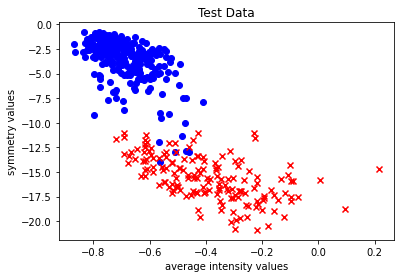

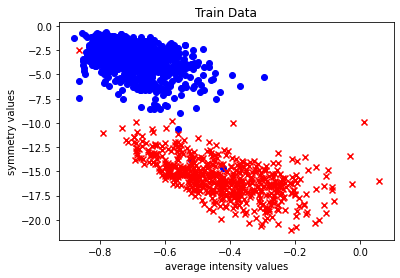

In [4]:
#Create a scatter plot for the test data
plt.title('Test Data')
plt.xlabel('average intensity values')
plt.ylabel('symmetry values')
plt.scatter(avg_intensity_test[test_labels == 1], symmetry_test[test_labels == 1], marker='o', c='blue')
plt.scatter(avg_intensity_test[test_labels == -1], symmetry_test[test_labels == -1], marker='x', c='red')
plt.show()

#Create a scatter plot for the train data
plt.title('Train Data')
plt.xlabel('average intensity values')
plt.ylabel('symmetry values')
plt.scatter(avg_intensity_train[train_labels == 1], symmetry_train[train_labels == 1], marker='o', c='blue')
plt.scatter(avg_intensity_train[train_labels == -1], symmetry_train[train_labels == -1], marker='x', c='red')
plt.show()

**Implementing Representation 2:** Come up with an alternative feature extraction approach. The features can again be 2-D, or higher dimensional. If you use any external resource, please cite the references. Explain the feature extraction procedure clearly in your report; if it is an algorithm, provide the algorithm; if it is a function, provide the mathematical expressions. 

If your proposed features are 2-D or 3-D, provide the scatter plots similar to the previous step.

We will refer this representation proposed by you as **Representation 2**.

In [5]:
###################################  TRAIN DATA

#Create the feature 'standard deviation' by taking the standard deviation of each row in the training data
#Reshape the result to 2 dimensions
sd_train = np.std(train_data, axis=1).reshape(1561,1)

#Create the feature 'skewness' by subtracting mean from every data point, taking it third power, dividing 
#by the number of data points and taking 1/3th power.
i = 0
t = 0

skewness_train = np.empty([1561,1])

for i in range(0,1561):
    a = 0
    for t in range(0,256):
         a += (train_data[i,t]-avg_intensity_train[i])**3 
            
    skewness_train[i,] = np.sign(a) * (np.abs(a/256)) ** (1/3)  

#Joint the two features together
train_data_rep2 = np.hstack((sd_train,skewness_train))

###################################  TEST DATA  

#Create the feature 'standard deviation' by taking the standard deviation of each row in the training data
#Reshape the result to 2 dimensions
sd_test = np.std(test_data, axis=1).reshape(424,1)


#Create the feature 'skewness' 
i = 0
t = 0

skewness_test = np.empty([424,1])

for i in range(0,424):
    a = 0
    for t in range(0,256):
         a += (test_data[i,t]-avg_intensity_test[i])**3 
            
    skewness_test[i,] = np.sign(a) * (np.abs(a/256)) ** (1/3)
    
#Joint the two features together
test_data_rep2 = np.hstack((sd_test,skewness_test))    

   

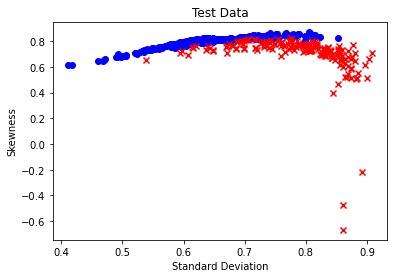

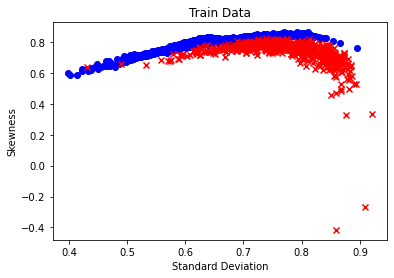

In [6]:
#Create a scatter plot for the test data
plt.title('Test Data')
plt.xlabel('Standard Deviation')
plt.ylabel('Skewness')
plt.scatter(sd_test[test_labels == 1], skewness_test[test_labels == 1], marker='o', c='blue')
plt.scatter(sd_test[test_labels == -1], skewness_test[test_labels == -1], marker='x', c='red')
plt.show()

#Create a scatter plot for the train data
plt.title('Train Data')
plt.xlabel('Standard Deviation')
plt.ylabel('Skewness')
plt.scatter(sd_train[train_labels == 1], skewness_train[train_labels == 1], marker='o', c='blue')
plt.scatter(sd_train[train_labels == -1], skewness_train[train_labels == -1], marker='x', c='red')
plt.show()

##Logistic Regression

Implement the logistic regression classifier from scratch with gradient descent and train it using Representation 1 and Representation 2 as inputs. Concatenate
1 to your features for the intercept term, such that one data point will look like for 2-D features [1,$x_1$,$x_2$], and the model vector will be [$w_0, w_1, w_2$], where $w_0$ is the intercept parameter. 
You can refer to lecture notes (Logistic regression slides 29-30) to review the gradient descent learning algorithm and the logistic loss. To implement the gradient of the logistic loss with respect to $w$, first derive its expression by hand. Please include your derivation in your report.

To prove that your implementation is converging, keep the loss values at each gradient descent iteration in a numpy array. After the training is finalized, plot the loss values
with respect to iteration count (Hint: `plt.plot`). You should observe a decreasing loss as the number of iterations increases. Also, experiment with 5 different learning rates between 0 and 1, and plot the convergence curves for each learning rate in the same plot to observe the effect of the learning rate (step size) on the convergence. 

To decide when to terminate the gradient descent iterations, check the absolute difference between the current loss value and the loss value of the previous step. If the difference is less than a small number, such as $10^{-5}$, you can exit the loop.

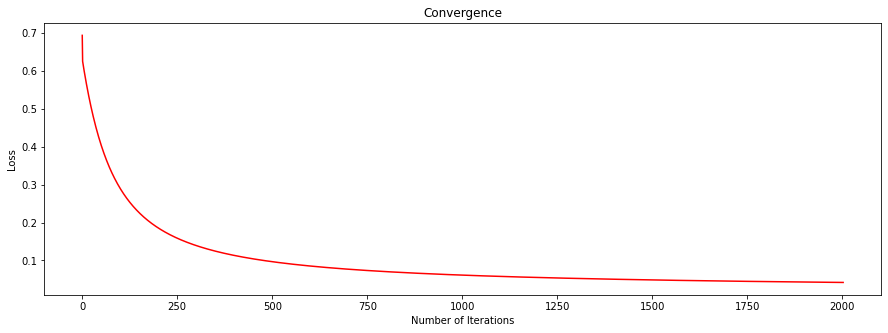

In [8]:
#Concatenate 1 to Representation 1
X_train_rep1 = np.append(np.ones((1561,1)),train_data_rep1,axis=1)
X_test_rep1 = np.append(np.ones((424,1)),test_data_rep1,axis=1)

#Concatenate 1 to Representation 2
X_train_rep2 = np.append(np.ones((1561,1)),train_data_rep2,axis=1)
X_test_rep2 = np.append(np.ones((424,1)),test_data_rep2,axis=1)

#Compute sigmoid
def sigmoid(s):
    return 1 / (1 + np.exp(-s))

#Compute the logistic loss
def compute_loss(y_train,X_train,weights):
    j = 0
    loss = 0
    for j in range(0,len(y_train)):
        loss += np.log(1+np.exp(-y_train[j]*weights.T @ X_train[j,:]))                                  
    return (1/len(y_train))*loss

#Compute the gradient
def compute_gradient(y_train,X_train,weights):
    j = 0
    ein_w = 0
    for j in range(0,len(y_train)):
        ein_w += (y_train[j]*X_train[j,:])*sigmoid(-y_train[j]*weights.T @ X_train[j,:]) 
    return -(1/len(y_train)*ein_w )

#Perform logistic regression and keep the loss values at each gradient descent
def log_regression_with_training_loss(y_train, X_train, learning_rate):
    w0,w1,w2 = 0,0,0
    weights = np.array([[w0],[w1],[w2]])
    w_star = []
    training_loss = []
    t = 0
    while(t < 2 or (np.absolute(training_loss[-1] - training_loss[-2]) > 10**(-5))):
        t+=1
        ein_w = compute_gradient(y_train,X_train,weights)
        training_loss.append(compute_loss(y_train,X_train,weights))
        v_t = -ein_w
        weights = weights + np.asarray(learning_rate*v_t).reshape(3,1)   
    w_star.append(weights)
    return w_star, training_loss

#Display convergence
def plot_convergence(training_loss, title):
    plt.figure(figsize=(15,5))
    plt.plot(range(len(training_loss)), training_loss, color='red')
    plt.title(title)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss")
    plt.show()
    
#Perform logistic regression to Representation 1 with the learning rate 0.05 
# and plot convergence
w_star_rep1,training_loss_rep1 = log_regression_with_training_loss(train_labels, X_train_rep1, 0.05)
plot_convergence(training_loss_rep1,'Convergence')



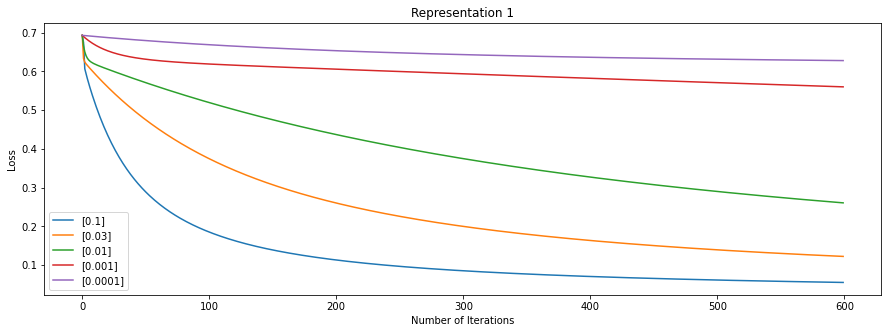

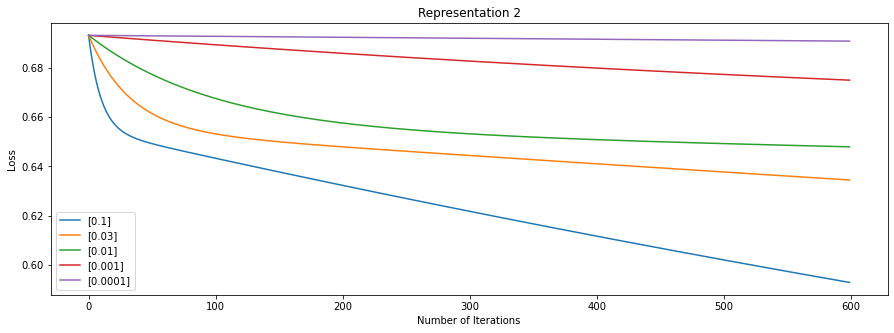

In [9]:
#Compare different learning rates
def plot_different_learning_rates(y_train, X_train, learning_rates, title):
    plt.figure(figsize=(15,5))
    plt.title(title)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss")
    for i in range(0,5):
        training_loss = []
        w0,w1,w2 = 0,0,0
        weights = np.array([[w0],[w1],[w2]])
        for t in range(0,600):
            ein_w = compute_gradient(y_train,X_train,weights)
            training_loss.append(compute_loss(y_train,X_train,weights))
            v_t = -ein_w
            weights = weights + np.asarray(learning_rates[i,]*v_t).reshape(3,1)
        plt.plot(range(len(training_loss)), training_loss, label=learning_rates[i,])
    plt.legend()
    plt.show()
    
#Plot the convergence curves for 5 learning rates in the same plot  
learning_rates = np.array([[0.1],[0.03],[0.01],[0.001],[0.0001]])

plot_different_learning_rates(train_labels, X_train_rep1, learning_rates, "Representation 1")
plot_different_learning_rates(train_labels, X_train_rep2, learning_rates, "Representation 2")


Implement logistic regression with $\ell_2$ norm regularization, $||\mathbf{w}||_{2}^{2}$ . Show that your implementation is working by visualizing the loss over the iterations again. Visualization for a single learning rate and $\lambda$ suffices. 

In [10]:
#Perform regularized logistic regression and keep the loss values at each gradient descent
def log_regression_reg_with_training_loss(y_train, X_train, learning_rate, lambda_):
    w0,w1,w2 = 0,0,0
    weights = np.array([[w0],[w1],[w2]])
    w_star_reg = []
    training_loss = []
    t = 0
    while(t < 2 or (np.absolute(training_loss[-1] - training_loss[-2]) > 10**(-5))):
        t+=1
        ein_w = compute_gradient(y_train,X_train,weights)
        training_loss.append(compute_loss(y_train,X_train,weights))
        v_t = -ein_w
        weights = weights + learning_rate*(np.asarray(v_t).reshape(3,1)-(2*lambda_*weights))     
    w_star_reg.append(weights)
    
    return w_star_reg, training_loss


#Perform regularized logistic regression to Representation 1 with the learning rate 0.05 and lambda 0.01
w_star_reg_rep1,training_loss_reg_rep1 = log_regression_reg_with_training_loss(train_labels, X_train_rep1, 0.1, 0.01)

#Perform regularized logistic regression to Representation 2 with the learning rate 0.05 and lambda 0.01
w_star_reg_rep2,training_loss_reg_rep2 = log_regression_reg_with_training_loss(train_labels, X_train_rep1, 0.1, 0.01)

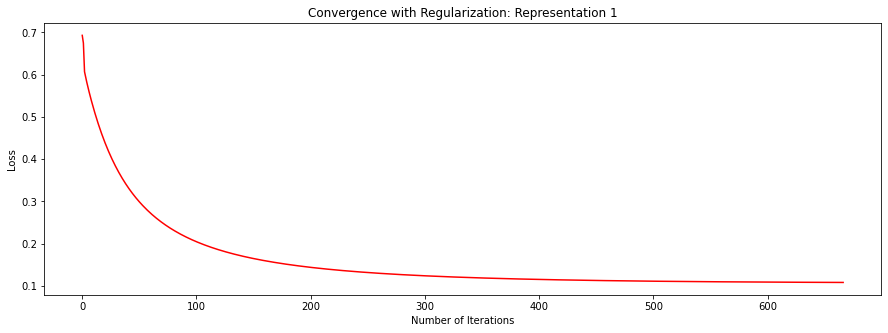

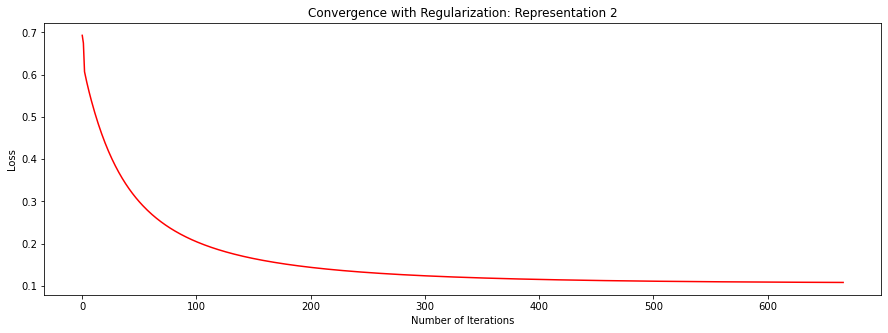

In [11]:
#Plot convergence with regularization
plot_convergence(training_loss_reg_rep1, "Convergence with Regularization: Representation 1")
plot_convergence(training_loss_reg_rep2, "Convergence with Regularization: Representation 2")

Implement a 5-fold cross validation procedure to find the optimal $\lambda$ value for both Representation 1 and 2. Experiment with at least three different $\lambda$ values between 0 and 1. Report the mean/std of cross validation accuracy of every representation/parameter combination as a table and clearly mark the best configuration in your report. 

In [12]:
#Perform regularized logistic regression 
def log_regression_reg_without_training_loss(y_train, X_train, learning_rate, lambda_):
    w0,w1,w2 = 0,0,0
    weights = np.array([[w0],[w1],[w2]])
    w_star_reg = []
    training_loss = []
    t = 0
    while(t < 2 or (np.absolute(training_loss[-1] - training_loss[-2]) > 10**(-5))):
        t+=1
        ein_w = compute_gradient(y_train,X_train,weights)
        training_loss.append(compute_loss(y_train,X_train,weights))
        v_t = -ein_w
        weights = weights + learning_rate*(np.asarray(v_t).reshape(3,1)-(2*lambda_*weights))     
    w_star_reg.append(weights)
    
    return w_star_reg

#Make the prediction
def predict(X, w_star):
    return X @ w_star

#Perform regularized logistic regression and compute accuracy
def compute_accuracy(y_test, y_train, X_test, X_train, learning_rate, lambda_):
    w_star_reg = log_regression_reg_without_training_loss(y_train, X_train, learning_rate, lambda_)
    w_star_reg = np.array(w_star_reg).reshape(3,1)
    prediction = predict(X_test, w_star_reg)
    y_predict = np.where(prediction > 0 , 1, -1)
    correct = np.count_nonzero((np.equal(y_test,y_predict)))                            
    return correct / len(y_test)

#Perform 5-fold cross validation and return 5 accuracies
def perform_cross_validation(X_folds, y_folds):
    accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5 = [],[],[],[],[]
    
    for i in range(0,5):
        X_train = list(X_folds) 
        X_test = np.array(X_train.pop(i))
        X_train = np.concatenate(X_train)
    
        y_train = list(y_folds)
        y_test = np.array(y_train.pop(i))
        y_test.resize(len(y_test),1)
        y_train = np.concatenate(y_train) 
        y_train.resize(len(y_train),1)
    
        accuracy_1.append(compute_accuracy(y_test, y_train, X_test, X_train, 0.1, 0.05))
        accuracy_2.append(compute_accuracy(y_test, y_train, X_test, X_train, 0.1, 0.09))  
        accuracy_3.append(compute_accuracy(y_test, y_train, X_test, X_train, 0.1, 0.1))
        accuracy_4.append(compute_accuracy(y_test, y_train, X_test, X_train, 0.1, 0.3))
        accuracy_5.append(compute_accuracy(y_test, y_train, X_test, X_train, 0.1, 0.6))
        
    acc_1 = np.array(accuracy_1)  
    acc_2 = np.array(accuracy_2)
    acc_3 = np.array(accuracy_3)
    acc_4 = np.array(accuracy_4)
    acc_5 = np.array(accuracy_5)
    
    return acc_1,acc_2,acc_3,acc_4,acc_5

#Split Representation 1 training data into 5 folds
X_folds_rep1 = np.array_split(X_train_rep1, 5) 

#Split Representation 2 training data into 5 folds
X_folds_rep2 = np.array_split(X_train_rep2, 5) 

#Split labels of training data into 5 folds
y_folds = np.array_split(train_labels, 5) 
 
#Perform 5-fold cross validation on Representation 1 and compute accuracies    
acc_1_rep1, acc_2_rep1, acc_3_rep1, acc_4_rep1, acc_5_rep1 = perform_cross_validation(X_folds_rep1, y_folds)
#Perform 5-fold cross validation on Representation 2 and compute accuracies   
acc_1_rep2, acc_2_rep2, acc_3_rep2, acc_4_rep2, acc_5_rep2 = perform_cross_validation(X_folds_rep2, y_folds)

In [20]:
acc_rep1 = np.mean([acc_1_rep1, acc_2_rep1, acc_3_rep1, acc_4_rep1, acc_5_rep1])
print(f"Mean of accuracies for Representation 1: {acc_rep1}")


Mean of accuracies for Representation 1: 0.8545064307364627


In [21]:
acc_rep2 = np.mean([acc_1_rep2, acc_2_rep2, acc_3_rep2, acc_4_rep2, acc_5_rep2])
print(f"Mean of accuracies for Representation 2: {acc_rep2}")

Mean of accuracies for Representation 2: 0.6435897435897436


## Task 3: Evaluation (25 Pts)

**(5 points)** Train the logistic regression classifier on Representation 1 and 2 with the best learning rate you decide. Similarly, train the regularized logistic regression classifier with the best $\lambda$ you obtained by 5-fold cross validation. Report the training and test classification accuracy as 
\begin{align*}
\frac{\text{number of correctly classified samples}}{\text{total number of samples}}x100
\end{align*}

In [22]:
train_labels = train_labels.reshape(1561,1)
test_labels = test_labels.reshape(424,1)

def accuracy(y, X, w_star):
    prediction = predict(X,w_star)
    y_predict = np.where(prediction > 0 , 1, -1)
    correct = np.count_nonzero((np.equal(y, y_predict)))  
    
    return correct / len(y)

def train_logistic_reg_classifier(y_train, X_train, y_test, X_test, learning_rate, lambda_):
    w_star = log_regression_reg_without_training_loss(y_train, X_train, learning_rate, lambda_)
    w_star = np.array(w_star).reshape(3,1)
    training_acc = accuracy(y_train, X_train, w_star)
    test_acc = accuracy(y_test, X_test, w_star)
    return training_acc, test_acc


#Accuracy for Representation 1
training_acc_rep1, test_acc_rep1 = train_logistic_reg_classifier(train_labels, X_train_rep1, test_labels, 
                                                                 X_test_rep1, 0.1, 0)

training_acc_rep1_reg, test_acc_rep1_reg = train_logistic_reg_classifier(train_labels, X_train_rep1, test_labels, 
                                                                 X_test_rep1, 0.1, 0.05)

#Accuracy for Representation 2
training_acc_rep2, test_acc_rep2 = train_logistic_reg_classifier(train_labels, X_train_rep2, test_labels, 
                                                                 X_test_rep2, 0.1, 0)

training_acc_rep2_reg, test_acc_rep2_reg = train_logistic_reg_classifier(train_labels, X_train_rep2, test_labels, 
                                                                 X_test_rep2, 0.1, 0.05)

print(f"Training accuracy for Representation 1: {training_acc_rep1}")
print(f"Test accuracy for Representation 1: {test_acc_rep1}\n")

print(f"Training accuracy with regularization for Representation 1: {training_acc_rep1_reg}")
print(f"Test accuracy with regularization for Representation 1: {test_acc_rep1_reg}\n")

print(f"Training accuracy for Representation 2: {training_acc_rep2}")
print(f"Test accuracy for Representation 2: {test_acc_rep2}\n")

print(f"Training accuracy with regularization for Representation 2: {training_acc_rep2_reg}")
print(f"Test accuracy with regularization for Representation 2: {test_acc_rep2_reg}\n")

Training accuracy for Representation 1: 0.9974375400384369
Test accuracy for Representation 1: 0.9787735849056604

Training accuracy with regularization for Representation 1: 0.9897501601537476
Test accuracy with regularization for Representation 1: 0.964622641509434

Training accuracy for Representation 2: 0.8737988468930173
Test accuracy for Representation 2: 0.8632075471698113

Training accuracy with regularization for Representation 2: 0.643818065342729
Test accuracy with regularization for Representation 2: 0.625



**(15 points)** Visualize the decision boundary (the line that is given by $\mathbf{w}^{T}x=0$) obtained from the logistic regression classifier learned without regularization. For this purpose, use only Representation 1. Provide two scatter plots for training and test data points with the decision boundary shown on each of the plots.

In [23]:
#Perform logistic regression without keeping track of training loss
def log_regression(y_train, X_train, learning_rate):
    w0,w1,w2 = 0,0,0
    weights = np.array([[w0],[w1],[w2]])
    w_star = []
    training_loss = []
    t = 0
    while(t < 2 or (np.absolute(training_loss[-1] - training_loss[-2]) > 10**(-5))):
        t+=1
        ein_w = compute_gradient(y_train,X_train,weights)
        training_loss.append(compute_loss(y_train,X_train,weights))
        v_t = -ein_w
        weights = weights + np.asarray(learning_rate*v_t).reshape(3,1)   
    w_star.append(weights)
    return w_star

#Perform logistic regression using both the training and test data
w_star_training = log_regression(train_labels, X_train_rep1, 0.1)
w_star_test = log_regression(test_labels, X_test_rep1, 0.1)


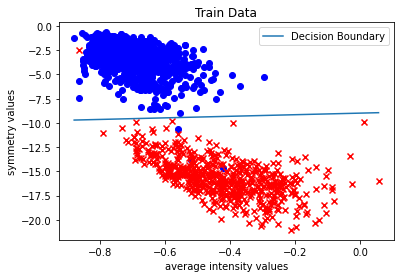

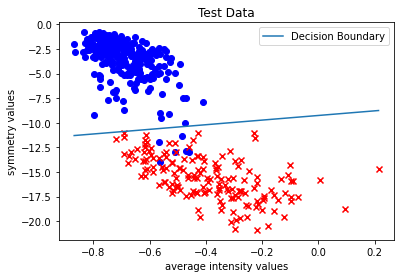

In [24]:
'''Here, to draw best line for the decision boundary, we take the values minimum and maximum x-values.
However, these values does not satisfy w.T x = 0.
Then, we take the x-values which satisfy w.T x = 0. 
y1_ and y2_ help us to see where w.T x = 0. From this 0 values in y1_ and y2_, we decide which cell of X we have to choose.
By analyzing np.array(np.nonzero(y1_)) and np.array(np.nonzero(y2_)), we can see which cell is zero.
For example, the cell [1560,1] of train data implement the equality when multiplying w.T '''

###### Train data in representation 1
w1_ = np.array(w_star_training).reshape(3,1)
y1_ = np.where(np.dot(X_train_rep1, w1_) < 0, 0, 1)
np.array(np.nonzero(y1_))
#we need two x-values to draw line. 
#Here, we take min and max of X in 2nd column(refers to avarage intensity values)
#Because we want the line to be along the plot we draw.
x_values_train = np.array([np.min(X_train_rep1[:,1]), np.max(X_train_rep1[:,1])])
#But, these x-values do not satisfy w.T x = 0. So, we take two x-values satisfying w.T x = 0.
x_values_train_ = np.array([X_train_rep1[115,1], X_train_rep1[1560,1]])
#Then, we find y-values in the plot by using x-values in x_values_train_
y_values_train = (-1/w1_[2]) * (w1_[1] * x_values_train_ + w1_[0])


###### Test data in representation 1
#The notes in train data part are valid for test data part but only the values we use are different.
w2_ = np.array(w_star_test).reshape(3,1)
y2_ = np.where(np.dot(X_test_rep1, w2_) < 0, 0, 1)
np.array(np.nonzero(y2_))
x_values_test = np.array([np.min(X_test_rep1[:,1]), np.max(X_test_rep1[:,1])])
x_values_test_= np.array([X_test_rep1[151,1], X_test_rep1[423,1]])
y_values_test = (-1/w2_[2]) * (w2_[1] * x_values_test_ + w2_[0])


plt.title('Train Data')
plt.xlabel('average intensity values')
plt.ylabel('symmetry values')
plt.plot(x_values_train, y_values_train, label='Decision Boundary')
plt.legend()
plt.scatter(avg_intensity_train[train_labels == 1], symmetry_train[train_labels == 1], marker='o', c='blue')
plt.scatter(avg_intensity_train[train_labels == -1], symmetry_train[train_labels == -1], marker='x', c='red')
plt.show()


plt.title('Test Data')
plt.xlabel('average intensity values')
plt.ylabel('symmetry values')
plt.plot(x_values_test, y_values_test, label='Decision Boundary')
plt.legend()
plt.scatter(avg_intensity_test[test_labels == 1], symmetry_test[test_labels == 1], marker='o', c='blue')
plt.scatter(avg_intensity_test[test_labels == -1], symmetry_test[test_labels == -1], marker='x', c='red')
plt.show()
